In [3]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import pandas as pd
import numpy as np

from weavingspace import TileUnit
from weavingspace import WeaveUnit

from weavingspace import Tiling

In [4]:
anthromes = gpd.read_file("NACIS-2022/anthromes-clip.gpkg", driver="GPKG")

In [5]:
anthromes.sindex
anthromes.has_sindex

True

In [6]:
anthromes.shape

(765, 5)

In [13]:
# unit = TileUnit(# tiling_type = "hex-colouring", 
#                 #  Note these alternatives:
#                 #  tiling_type = "hex-dissection", n = 3, 
#                 tiling_type = "hex-dissection", dissection_offset = 0, n = 3,
#                 crs = anthromes.crs, 
#                 spacing = 100000).transform_rotate(15).inset_tile(1250) \
#                   .inset_elements(1250)

unit = WeaveUnit(#weave_type = "twill", spacing = 35_000,
                 #strands = "a|b", aspect = 0.8,
                 weave_type = "cube", spacing = 35_000,
                 # strands = "a--|b--|c--", aspect = 1., # this is the open hex
                 strands = "a|b|c", aspect = .85,
                 crs = anthromes.crs).transform_rotate(15).inset_elements(900)

<AxesSubplot:>

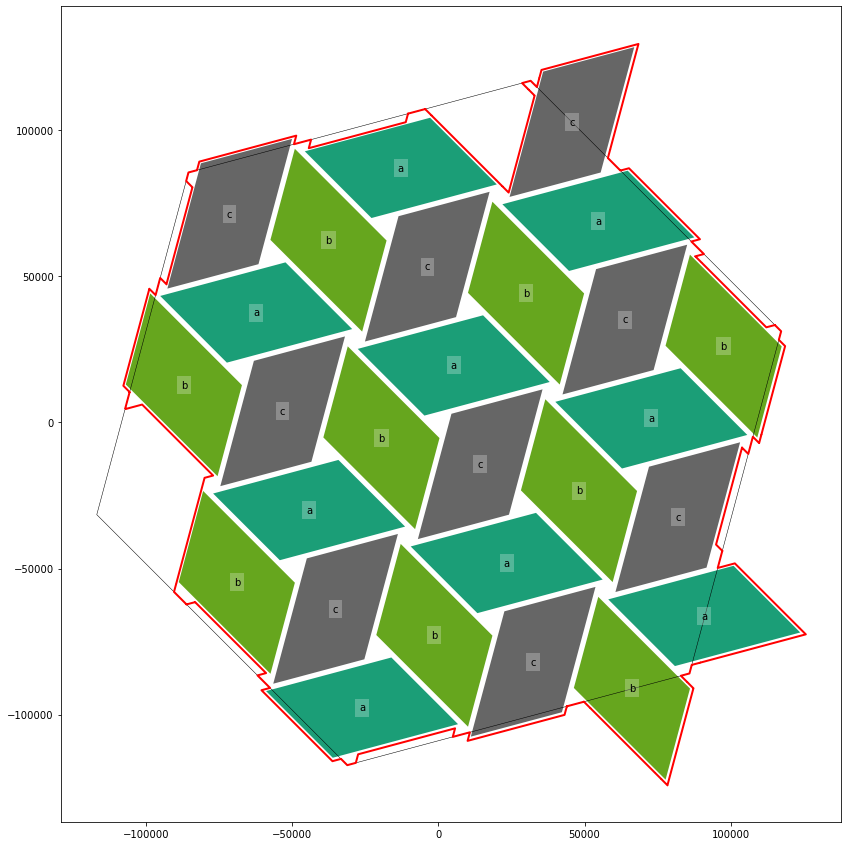

In [14]:
unit.plot(r = 0, show_ids = True, show_reg_tile = True, show_tile = True,
          figsize = (15, 15))

In [159]:
tiling = Tiling(unit, anthromes, id_var = "dissolved_id")

In [160]:
map = tiling.get_tiled_map(#prioritise_tiles = False,
                           #ragged_edges = False, 
                           debug = True)

STEP 1: prep data (rotation if requested): 0.000
STEP A5: build lookup for join: 17.191
STEP A6: perform lookup join: 0.007
STEP A7/B3: dissolve tiles within zones: 1.062


In [161]:
map.to_file('NACIS-2022/anthromes-tiled-cube-weave-spacing-35k-aspect-85-inset900.gpkg')

In [ ]:
this will cause an error

In [ ]:
map.variables = dict(zip(list("abc"),
                        ("1800AD", "1900AD", "2017AD")))
map.colourmaps = dict(zip(map.variables.values(), 
                         ("Spectral", "Spectral", "Spectral")))

fig = map.render(legend = False, scheme = "quantiles") # quantiles for interest

In [ ]:
map.dpi = 600  # don't ask me what makes sense for DPI
map.figsize = (10, 7)

fig = map.render(legend = False, scheme = "quantiles")

In [ ]:
fig.savefig("NACIS-2022/output/another-map.svg")